<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-données" data-toc-modified-id="Importation-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des données</a></span></li><li><span><a href="#Instanciation-et-lancement-des-calculs" data-toc-modified-id="Instanciation-et-lancement-des-calculs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instanciation et lancement des calculs</a></span></li><li><span><a href="#Scree-plot" data-toc-modified-id="Scree-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scree plot</a></span></li><li><span><a href="#Cercle-des-corrélations" data-toc-modified-id="Cercle-des-corrélations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cercle des corrélations</a></span></li><li><span><a href="#Représentation-des-individus-sur-le-plan-factoriel-F1-F2" data-toc-modified-id="Représentation-des-individus-sur-le-plan-factoriel-F1-F2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Représentation des individus sur le plan factoriel F1-F2</a></span></li><li><span><a href="#Représentation-des-variables-–-Outils-pour-l’aide-à-l’interprétation" data-toc-modified-id="Représentation-des-variables-–-Outils-pour-l’aide-à-l’interprétation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Représentation des variables – Outils pour l’aide à l’interprétation</a></span><ul class="toc-item"><li><span><a href="#contribution-des-individus-à-l'inertie-totale" data-toc-modified-id="contribution-des-individus-à-l'inertie-totale-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>contribution des individus à l'inertie totale</a></span></li><li><span><a href="#qualité-de-représentation-des-individus---COS2" data-toc-modified-id="qualité-de-représentation-des-individus---COS2-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>qualité de représentation des individus - COS2</a></span></li><li><span><a href="#Contribution-des-individus-aux-axes" data-toc-modified-id="Contribution-des-individus-aux-axes-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Contribution des individus aux axes</a></span></li><li><span><a href="#cosinus-carré-des-variables" data-toc-modified-id="cosinus-carré-des-variables-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>cosinus carré des variables</a></span></li><li><span><a href="#Contribution-des-individus-aux-axes" data-toc-modified-id="Contribution-des-individus-aux-axes-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Contribution des individus aux axes</a></span></li></ul></li><li><span><a href="#Analyse-et-conclusion" data-toc-modified-id="Analyse-et-conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse et conclusion</a></span><ul class="toc-item"><li><span><a href="#sélection-des-3-pays-ayant-le-meilleur-potentiels" data-toc-modified-id="sélection-des-3-pays-ayant-le-meilleur-potentiels-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>sélection des 3 pays ayant le meilleur potentiels</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data frames

import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# visualisation
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns

In [2]:
# sépatateurs milliers = , et 2 décimales
pd.options.display.float_format = '{:,.2f}'.format

## Importation des données

In [3]:
# import de clust_key_it1
pk  = pd.read_csv('data/clustkey_it1.csv', index_col=0)
pk.head(1)

,clust
country,
Armenia,2


In [4]:
# import de data_it1
data  = pd.read_csv('data/data_it1.csv', index_col=0)
data.head(1)

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio,clust
country,,,,,,,,,,
Armenia,2.98,100.00,"3,843.59",75.37,"2,924.00",90.06,48.01,13.44,80.00,2


In [5]:
# dimensions du df
print(data.shape)

#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]

(164, 10)


## Instanciation et lancement des calculs

In [6]:
# choix du nombre de composantes à calculer
n_comp = 9

# clusters auxquels appartiennent les pays
statut = [pk.loc[statut, 'clust'] for statut in data.index]

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[['pop_2013','pop_var','gdp_2013','edb_2019','food_kcal_cap_day','prot_g_cap_day',
                 'prot_ani_ratio','poultry_food_kg_cap_y','poultry_import_ratio']]

# préparation des données pour l'ACP
X = data_pca.values
names = data["clust"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
acp = decomposition.PCA(svd_solver='full',n_components=n_comp)
acp.fit(X_scaled)



PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [7]:
# variance corrigée méthode 1
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.21991755 1.32988995 0.86339031 0.81326787 0.7285906  0.42441261
 0.33062283 0.19092943 0.09897885]


## Scree plot

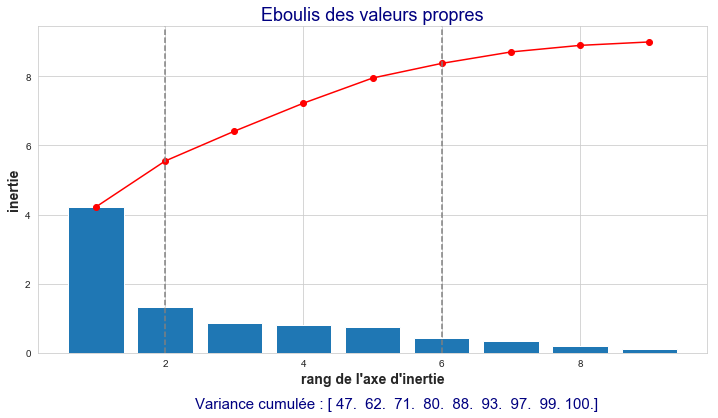

In [8]:
#scree plot 2
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

def display_scree_plot(acp):
    scree = acp.singular_values_**2/n 
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
    plt.xlabel("rang de l'axe d'inertie",size=14, fontweight='bold')
    plt.ylabel("inertie",size=14, fontweight='bold')
    plt.title("Eboulis des valeurs propres",color='navy', size=18)
    plt.axvline(2, linestyle='dashed', color = 'grey')
    plt.axvline(6, linestyle='dashed', color = 'grey')

display_scree_plot(acp)

v=np.cumsum(acp.explained_variance_ratio_)*100
plt.text(1,-1.6, "                        Variance cumulée : %s" %np.round(v,0), color ='navy', size=15)
plt.savefig('img/P5.3_screeplot2.png', dpi=120, bbox_inches='tight')

plt.show()
plt.close()  

In [9]:
# Proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.46887973 0.14776555 0.09593226 0.0903631  0.08095451 0.04715696
 0.03673587 0.02121438 0.01099765]


**Analyse**<br>
* Le coude apparaît dès la deuxième composante, mais cela coïncide avec les demandes du commenditaire, nous étudierons donc que le premier plan factoriel avec les composantes 1 et 2
* Le premier plan factoriel représente 62 % de la variance cumulée

## Cercle des corrélations

In [10]:
# Cercle des corrélations 
features = data_pca.columns
pcs = get_correlation(acp, X_scaled)
display_circles(pcs, n_comp, acp, [(0,1)], labels = np.array(features))

           
#plt.savefig('img/P5.3_cor_circle.png', dpi=120, bbox_inches='tight')

NameError: name 'get_correlation' is not defined

**Analyse**<br>
* Il apparaît clairement que les variables  prot_g_cap_day,  prot_ani_ratio , food_kcal_cap_day ,  edb_2019 , gdp_2013 et, dans une moindre mesure, poultry_food_ kg_cap_day sont très bien représentées sur l’axe de du premier plan
* Il faut également noter une anti-corrélation sur ce plan entre pop_var et edb_2019
* Sur le deuxième plan, nous avons une projection anti-corrélée entre pop_2013 et poultry_import_ratio
* Il faut privilégier les individus les mieux positivement représentés sur l’axe F1
* Nous devons donc chercher les individus représentés le plus à droite sur le premier plan factoriel F1

## Représentation des individus sur le plan factoriel F1-F2

In [ ]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='12', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),size=13, fontweight='bold')
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),size=13, fontweight='bold')

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1),color='navy', size=16)
            plt.show(block=False)


In [ ]:
# Projection des individus
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, acp, [(0,1)], labels = None, illustrative_var = statut, alpha = 0.8)

plt.savefig('img/P5.3_individus.png', dpi=120, bbox_inches='tight')

plt.show()

**Analyse**<br>
* Selon le cercle des corrélations, nous cherchons donc les individus qui ont les valeurs les plus élevées sur l’axe F1
* Graphiquement, on constate que cela concerne le cluster 1, ainsi qu’un ou deux des éléments des clusters 2 et 3

## Représentation des variables – Outils pour l’aide à l’interprétation

### contribution des individus à l'inertie totale

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
# Création du data frame
contrib = pd.DataFrame({'ID':data.index,'d_i':di})
contrib.sort_values('d_i', axis = 0, ascending = False, inplace = True) 
contrib.head(10)

### qualité de représentation des individus - COS2

In [ ]:
# qualité de représentation des individus - COS2
cos2 = pcs.T**2

ind_q = pd.DataFrame({'id':features,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

# tri décroissant 'COS2_1'
ind_q.sort_values('COS2_1', axis = 0, ascending = False, inplace = True) 
ind_q.head()

In [ ]:
# tri décroissant 'COS2_2'
ind_q.sort_values('COS2_2', axis = 0, ascending = False, inplace = True) 
ind_q.head()

### Contribution des individus aux axes

In [ ]:
#contributions
ctr = X_projected**2

for k in range(n_comp):
     ctr[:,k] = ctr[:,k]/(n*eigval[k])
        
#on n'affiche que pour les deux premiers axes
ctr = pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

# tri décroissant sur CTR_1
ctr.sort_values('CTR_1', axis = 0, ascending = False, inplace = True) 
ctr.head()

In [ ]:
# tri décroissant sur CTR_1
ctr.sort_values('CTR_2', axis = 0, ascending = False, inplace = True) 
ctr.head()

### cosinus carré des variables

In [ ]:
# cosinus carré des variables
cos2var = pcs.T**2
cos2 = pd.DataFrame({'id':features,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
cos2

### Contribution des individus aux axes

In [ ]:
#contributions aux axes
ctrvar = cos2var
for k in range(n_comp):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
#on n'affiche que pour les deux premiers axes
ctr = pd.DataFrame({'id':features,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})
ctr

## Analyse et conclusion

In [ ]:
# Sélection des 12 pays les mieux représentés sur F1
df = pd.DataFrame(X_projected, index=data.index, columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9'])
df.drop(['F2','F3','F4','F5','F6','F7','F8','F9'], axis=1, inplace = True)

# tri décroissant 'COS2_1'
df.sort_values('F1', axis = 0, ascending = False, inplace = True) 
df.head(12)

In [ ]:
# left joint sur df 
select = pd.merge(df, data, on='country', how = 'inner')
select.head(12)

### sélection des 3 pays ayant le meilleur potentiels

* Nous partons du principe que le comanditaire est européen, nous excluons Hong Kong, USA, Australia et Israel
* Luxembourg et Iceland ont moins d'un million d'habitants, cela semble insuffisant pour développer un marché
* Austria et Finland consomment moins de 20kg de volaille par an
* Poultry import ratio élevé pour Netherlands, le pays exporte 2 fois plus de volaille qu'il n'en consomme


**Les trois pays retenus sont donc : Norway, Denmark, Ireland** (ces pays sont dans le cluster 1)